## Path of the images

In a first time we need a function able to find the path to all the pictures that we are going to use for
the training of the model.

In [1]:
import os 

In [2]:
path = '/home/etienneguevel/Documents/SCAI/OT4D/OT4D/data_kaggle/bone_marrow_cell_dataset'

In [3]:
states = [s for s in os.listdir(path)]

In [4]:
states

['OTH',
 'HAC',
 'MMZ',
 'ART',
 'EOS',
 'FGC',
 'MON',
 'MYB',
 'PEB',
 'LYI',
 'PMO',
 'LYT',
 'NGB',
 'KSC',
 'NGS',
 'BLA',
 'NIF',
 'EBO',
 'ABE',
 'BAS',
 'PLM']

In [5]:
def find_files(path_dir):
    files = {}
    
    for (dirpath, dirnames, filenames) in os.walk(path_dir):
        temp = {os.path.join(dirpath, f): f for f in filenames}
        files.update(temp)

    return files

In [6]:
test = find_files(os.path.join(path, 'MMZ'))

In [7]:
for k, v in test.items():
    print(k, v)
    break

/home/etienneguevel/Documents/SCAI/OT4D/OT4D/data_kaggle/bone_marrow_cell_dataset/MMZ/3001-3055/MMZ_03027.jpg MMZ_03027.jpg


## Sanity check

As the image come from a kaggle dataset some may not work.  
Let's check if we can:
- open them
- pass them through the models

In [8]:
import numpy as np
import torch
from ot4d.main.helpers import initialize_model
from PIL import Image

/home/etienneguevel/Documents/SCAI/OT4D/OT4D/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
def image_checker(img_path, model, preprocessor):
    try:
        im = Image.open(img_path)
        im = im.convert("RGB")
        im.load()
        #im_pre = preprocessor(im)
        #im_pre = torch.unsqueeze(im_pre, 0)
        #model.model(im_pre)

    except:
        return False

    return True

In [52]:
path_dir = os.path.join("/home/etienneguevel/Documents/SCAI/OT4D/OT4D/sorted_data", "train")
path_dict = find_files(path_dir)

path_list = [k for k in path_dict.keys()]

model = initialize_model(model_name='resnet18', num_classes=21)
preprocessor = model.processor()

In [53]:
image_checker(path_list[0], model, preprocessor)

True

In [54]:
wrong_ = filter(lambda x: not image_checker(x, model, preprocessor), path_list)

In [55]:
wrong = list(wrong_)

In [57]:
wrong

['/home/etienneguevel/Documents/SCAI/OT4D/OT4D/sorted_data/train/MYB/MYB_05527.jpg']

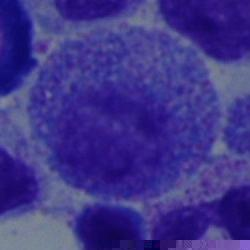

In [62]:
im = Image.open(wrong[0])
im

In [66]:
im.load()

In [64]:
original_path = "/home/etienneguevel/Documents/SCAI/OT4D/OT4D/data_kaggle/bone_marrow_cell_dataset/MYB/5001-6000/MYB_05527.jpg"
im = Image.open(original_path)
im = im.convert("RGB")
im

OSError: broken data stream when reading image file

Visibly there is an issue with one of the images (and in the original one too).   
One solution would be to add a step to the prepare_data pipeline date 
where we would look if we can open the image before copying it.